

<hr style="margin-bottom: 40px;">

# AMDT - MPF Portfolio Optimization Model

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## (A) Understanding the data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

#plt.style.use('fivethirtyeight')
df = pd.read_excel("AMTD.xlsx", parse_dates=True, index_col="date")


In [2]:
df.apply(pd.to_numeric, errors='ignore')
df = df.rename(columns=lambda x: x.strip())
df

,AMRCBLF HK Equity,AMRCASF HK Equity,AMRDALF HK Equity,AMRCGRF HK Equity,AMRSGRF HK Equity,AMINAGP HK Equity,AMINASF HK Equity,AMINCAA HK Equity,AMINEUF HK Equity,AMIGBOF HK Equity,AMIHKCF HK Equity,AMIMCOF HK Equity,AMIT18R HK Equity,AMIT28R HK Equity,AMIT38R HK Equity,AMIT48R HK Equity
date,,,,,,,,,,,,,,,,
2000-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,16.39,13.39,13.18,18.00,14.95,11.6316,17.4413,12.0733,14.6092,11.4594,16.7664,10.1914,14.1907,15.3507,16.8613,17.6810
2020-07-28,16.48,13.43,13.18,18.12,15.01,11.6361,17.6109,12.0575,14.6926,11.4906,16.9794,10.1913,14.2466,15.4165,16.9393,17.7709
2020-07-29,16.52,13.45,13.20,18.17,15.04,11.6509,17.5575,12.1054,14.6512,11.4927,17.0443,10.1913,14.2541,15.4267,16.9526,17.7882


In [3]:
df.info() #dropped the funds that have not enough data for analysis. #no need for type conversion.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5053 entries, 2000-12-01 to 2020-07-31
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AMRCBLF HK Equity  2617 non-null   float64
 1   AMRCASF HK Equity  2617 non-null   float64
 2   AMRDALF HK Equity  2617 non-null   float64
 3   AMRCGRF HK Equity  2617 non-null   float64
 4   AMRSGRF HK Equity  189 non-null    float64
 5   AMINAGP HK Equity  684 non-null    float64
 6   AMINASF HK Equity  2617 non-null   float64
 7   AMINCAA HK Equity  684 non-null    float64
 8   AMINEUF HK Equity  2617 non-null   float64
 9   AMIGBOF HK Equity  2617 non-null   float64
 10  AMIHKCF HK Equity  2617 non-null   float64
 11  AMIMCOF HK Equity  2617 non-null   float64
 12  AMIT18R HK Equity  2543 non-null   float64
 13  AMIT28R HK Equity  2617 non-null   float64
 14  AMIT38R HK Equity  2601 non-null   float64
 15  AMIT48R HK Equity  2617 non-null   float64
dtypes: flo

In [4]:
df = df.drop(["AMRSGRF HK Equity", "AMINAGP HK Equity", "AMINCAA HK Equity"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5053 entries, 2000-12-01 to 2020-07-31
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AMRCBLF HK Equity  2617 non-null   float64
 1   AMRCASF HK Equity  2617 non-null   float64
 2   AMRDALF HK Equity  2617 non-null   float64
 3   AMRCGRF HK Equity  2617 non-null   float64
 4   AMINASF HK Equity  2617 non-null   float64
 5   AMINEUF HK Equity  2617 non-null   float64
 6   AMIGBOF HK Equity  2617 non-null   float64
 7   AMIHKCF HK Equity  2617 non-null   float64
 8   AMIMCOF HK Equity  2617 non-null   float64
 9   AMIT18R HK Equity  2543 non-null   float64
 10  AMIT28R HK Equity  2617 non-null   float64
 11  AMIT38R HK Equity  2601 non-null   float64
 12  AMIT48R HK Equity  2617 non-null   float64
dtypes: float64(13)
memory usage: 552.7 KB


In [5]:
df.tail()  #check if funds are still in operation till now

,AMRCBLF HK Equity,AMRCASF HK Equity,AMRDALF HK Equity,AMRCGRF HK Equity,AMINASF HK Equity,AMINEUF HK Equity,AMIGBOF HK Equity,AMIHKCF HK Equity,AMIMCOF HK Equity,AMIT18R HK Equity,AMIT28R HK Equity,AMIT38R HK Equity,AMIT48R HK Equity
date,,,,,,,,,,,,,
2020-07-27,16.39,13.39,13.18,18.00,17.4413,14.6092,11.4594,16.7664,10.1914,14.1907,15.3507,16.8613,17.6810
2020-07-28,16.48,13.43,13.18,18.12,17.6109,14.6926,11.4906,16.9794,10.1913,14.2466,15.4165,16.9393,17.7709
2020-07-29,16.52,13.45,13.20,18.17,17.5575,14.6512,11.4927,17.0443,10.1913,14.2541,15.4267,16.9526,17.7882
2020-07-30,16.46,13.44,13.19,18.08,17.6800,14.3242,11.5174,16.9541,10.1913,14.2433,15.3936,16.8905,17.6938
2020-07-31,16.45,13.43,13.19,18.05,17.5798,14.2983,11.5579,16.9242,10.1910,14.2689,15.4083,16.8911,17.6765


In [6]:
df.dropna(axis="index",how="all") #drop NaN values. The earliest data starts from 2010-4-5.

,AMRCBLF HK Equity,AMRCASF HK Equity,AMRDALF HK Equity,AMRCGRF HK Equity,AMINASF HK Equity,AMINEUF HK Equity,AMIGBOF HK Equity,AMIHKCF HK Equity,AMIMCOF HK Equity,AMIT18R HK Equity,AMIT28R HK Equity,AMIT38R HK Equity,AMIT48R HK Equity
date,,,,,,,,,,,,,
2010-04-05,11.08,10.54,10.13,11.39,11.7935,11.0679,10.1219,11.3104,9.9998,NaN,11.0246,NaN,11.4454
2010-04-06,11.20,10.60,10.15,11.54,11.9296,11.1473,10.1388,11.4125,9.9998,NaN,11.1061,NaN,11.5629
2010-04-07,11.21,10.57,10.13,11.58,11.9804,11.1465,10.0975,11.4125,9.9998,NaN,11.1087,NaN,11.5901
2010-04-08,11.21,10.57,10.13,11.57,11.9458,11.1507,10.0639,11.3053,9.9998,NaN,11.0658,NaN,11.5434
2010-04-09,11.24,10.58,10.14,11.60,12.0070,11.1041,10.0841,11.3910,9.9998,NaN,11.0880,NaN,11.5662
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,16.39,13.39,13.18,18.00,17.4413,14.6092,11.4594,16.7664,10.1914,14.1907,15.3507,16.8613,17.6810
2020-07-28,16.48,13.43,13.18,18.12,17.6109,14.6926,11.4906,16.9794,10.1913,14.2466,15.4165,16.9393,17.7709
2020-07-29,16.52,13.45,13.20,18.17,17.5575,14.6512,11.4927,17.0443,10.1913,14.2541,15.4267,16.9526,17.7882


In [7]:
describe = df.describe()
describe

,AMRCBLF HK Equity,AMRCASF HK Equity,AMRDALF HK Equity,AMRCGRF HK Equity,AMINASF HK Equity,AMINEUF HK Equity,AMIGBOF HK Equity,AMIHKCF HK Equity,AMIMCOF HK Equity,AMIT18R HK Equity,AMIT28R HK Equity,AMIT38R HK Equity,AMIT48R HK Equity
count,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2543.000000,2617.000000,2601.000000,2617.000000
mean,13.008781,11.435797,11.426458,13.984215,14.396799,14.393210,10.355622,13.331739,10.022405,12.211078,12.989095,13.801791,14.297824
std,1.598254,0.745137,0.802417,2.066649,1.853161,2.706996,0.312357,2.285998,0.044556,1.050875,1.438767,2.009521,2.400255
min,9.810000,9.800000,9.920000,9.700000,9.733800,9.300800,9.620400,8.487900,9.998800,10.043800,10.129000,9.929800,9.646900
25%,11.770000,10.900000,10.640000,12.400000,13.115800,11.604900,10.165100,11.657500,10.000700,11.334550,11.795000,12.179600,12.429200
50%,12.920000,11.370000,11.550000,13.920000,14.105300,14.942800,10.311300,12.710800,10.007500,12.222800,13.000500,13.709500,14.164300
75%,14.280000,11.970000,12.030000,15.670000,15.579200,16.687300,10.524900,15.375500,10.009500,12.970400,14.150900,15.506900,16.229900
max,16.810000,13.450000,13.230000,19.050000,18.494900,19.560400,11.557900,19.268300,10.191400,14.356300,15.928500,17.937800,19.455800


Text(0.5, 1.0, 'Performance of AMTD Funds')

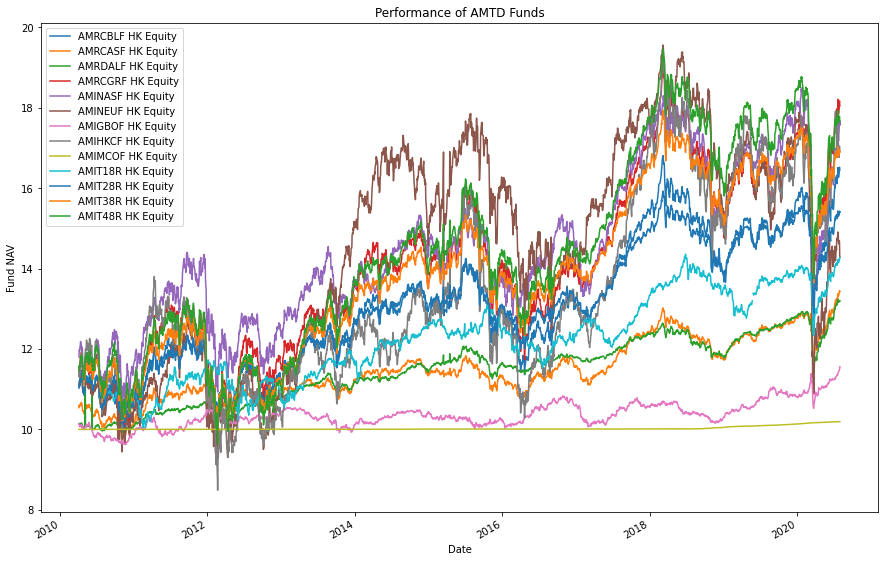

In [8]:
df.plot(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Fund NAV')
plt.title("Performance of AMTD Funds")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## (B) - Data Modelling



### Efficient Frontier - calculating expected return and risk matrix

In [9]:
#!pip install PyPortfolioOpt

In [10]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [11]:
from pypfopt.risk_models import CovarianceShrinkage
S = CovarianceShrinkage(df).ledoit_wolf()

In [12]:
S

,AMRCBLF HK Equity,AMRCASF HK Equity,AMRDALF HK Equity,AMRCGRF HK Equity,AMINASF HK Equity,AMINEUF HK Equity,AMIGBOF HK Equity,AMIHKCF HK Equity,AMIMCOF HK Equity,AMIT18R HK Equity,AMIT28R HK Equity,AMIT38R HK Equity,AMIT48R HK Equity
AMRCBLF HK Equity,1.154543e-02,4.959470e-03,0.003217,1.439727e-02,0.011751,0.014502,0.000197,0.016810,5.010192e-07,1.083372e-03,8.176409e-03,1.056849e-02,1.305717e-02
AMRCASF HK Equity,4.959470e-03,2.794795e-03,0.001544,6.137718e-03,0.004982,0.005628,0.000515,0.006995,7.036768e-07,5.296393e-04,3.557241e-03,4.448044e-03,5.380899e-03
AMRDALF HK Equity,3.217365e-03,1.543637e-03,0.010389,4.086521e-03,0.003562,0.004191,0.000158,0.004621,1.921748e-06,4.064346e-04,2.298263e-03,2.959425e-03,3.638350e-03
AMRCGRF HK Equity,1.439727e-02,6.137718e-03,0.004087,1.892700e-02,0.015092,0.019354,-0.000013,0.021775,4.678912e-07,1.334733e-03,1.058213e-02,1.377503e-02,1.709845e-02
AMINASF HK Equity,1.175140e-02,4.981633e-03,0.003562,1.509196e-02,0.032003,0.018761,0.000723,0.020438,-2.157718e-06,1.301287e-03,9.728136e-03,1.244447e-02,1.526530e-02
AMINEUF HK Equity,1.450206e-02,5.628382e-03,0.004191,1.935364e-02,0.018761,0.038667,-0.000028,0.018554,-2.672873e-06,1.504414e-03,1.235179e-02,1.624224e-02,2.015506e-02
AMIGBOF HK Equity,1.969990e-04,5.145214e-04,0.000158,-1.326106e-05,0.000723,-0.000028,0.001323,0.000293,1.738022e-06,1.876264e-04,7.028168e-04,5.244266e-04,3.756540e-04
AMIHKCF HK Equity,1.681027e-02,6.995481e-03,0.004621,2.177466e-02,0.020438,0.018554,0.000293,0.035708,1.285536e-06,1.358738e-03,1.329997e-02,1.714986e-02,2.115997e-02
AMIMCOF HK Equity,5.010192e-07,7.036768e-07,0.000002,4.678912e-07,-0.000002,-0.000003,0.000002,0.000001,1.484115e-04,5.042017e-07,9.267557e-07,6.406956e-07,3.202132e-07
AMIT18R HK Equity,1.083372e-03,5.296393e-04,0.000406,1.334733e-03,0.001301,0.001504,0.000188,0.001359,5.042017e-07,4.119831e-03,7.597278e-04,9.613203e-04,1.170269e-03


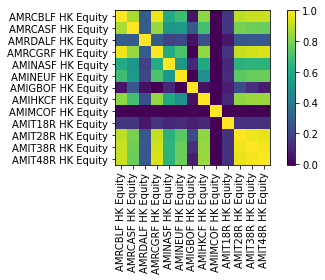

In [16]:
plotting.plot_covariance(S, plot_correlation=True)

In [17]:
#Calculate the expected returns and the annualised sample covariance matrix of daily asset returns.

from pypfopt.expected_returns import mean_historical_return
mu = mean_historical_return(df)


In [18]:
mu

AMRCBLF HK Equity    0.038802
AMRCASF HK Equity    0.023617
AMRDALF HK Equity    0.025753
AMRCGRF HK Equity    0.045350
AMINASF HK Equity    0.039204
AMINEUF HK Equity    0.024976
AMIGBOF HK Equity    0.012862
AMIHKCF HK Equity    0.039587
AMIMCOF HK Equity    0.001826
AMIT18R HK Equity    0.027979
AMIT28R HK Equity    0.032775
AMIT38R HK Equity    0.040590
AMIT48R HK Equity    0.042759
dtype: float64

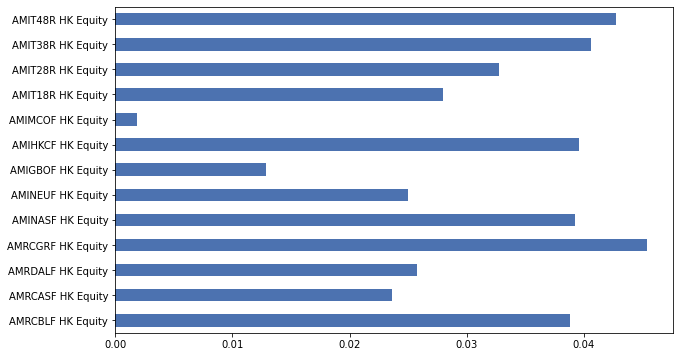

In [19]:
mu.plot.barh(figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Function 1a - Portfolio Optimization for maximal Sharpe ratio

### i.e. What combo of funds to choose within a scheme to earn the most and risk the least? 

In [20]:
#Optimize for maximal Sharpe ratio.
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close


OrderedDict([('AMRCBLF HK Equity', 0.0), ('AMRCASF HK Equity', 0.0), ('AMRDALF HK Equity', 0.00394), ('AMRCGRF HK Equity', 0.06551), ('AMINASF HK Equity', 0.0), ('AMINEUF HK Equity', 0.0), ('AMIGBOF HK Equity', 0.0), ('AMIHKCF HK Equity', 0.0), ('AMIMCOF HK Equity', 0.0), ('AMIT18R HK Equity', 0.48717), ('AMIT28R HK Equity', 0.0), ('AMIT38R HK Equity', 0.44338), ('AMIT48R HK Equity', 0.0)])


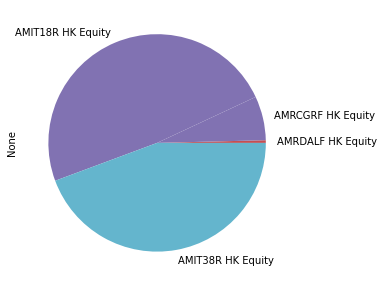

In [21]:
pd.Series(cleaned_weights).plot.pie(figsize=(5,5))

In [22]:
rt,vol,sharpe = ef.portfolio_performance(verbose=True)

Expected annual return: 3.5%
Annual volatility: 6.8%
Sharpe Ratio: 0.22


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Function 1b - Discrete Allocation of each fund

### i.e. How many shares for each fund should I buy?

In [20]:
#!pip install pulp

In [21]:
#Input amount of your portfolio
#tpv = float(input("Amount of your portfolio:"))     #Interactive element hidden for now.

In [22]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
print("Latest Price of all funds")
latest_prices

Latest Price of all funds


AMRCBLF HK Equity    16.4500
AMRCASF HK Equity    13.4300
AMRDALF HK Equity    13.1900
AMRCGRF HK Equity    18.0500
AMINASF HK Equity    17.5798
AMINEUF HK Equity    14.2983
AMIGBOF HK Equity    11.5579
AMIHKCF HK Equity    16.9242
AMIMCOF HK Equity    10.1910
AMIT18R HK Equity    14.2689
AMIT28R HK Equity    15.4083
AMIT38R HK Equity    16.8911
AMIT48R HK Equity    17.6765
Name: 2020-07-31 00:00:00, dtype: float64

In [23]:
cleaned_weights = ef.clean_weights()
weights = cleaned_weights 
#da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=tpv)     #Interactive element hidden for now.
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)     #Hide this if using input() function.
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'AMRDALF HK Equity': 4, 'AMRCGRF HK Equity': 54, 'AMIT18R HK Equity': 512, 'AMIT38R HK Equity': 394}
Funds remaining: $11.77


Text(0.5, 1.0, 'Performance of Funds')

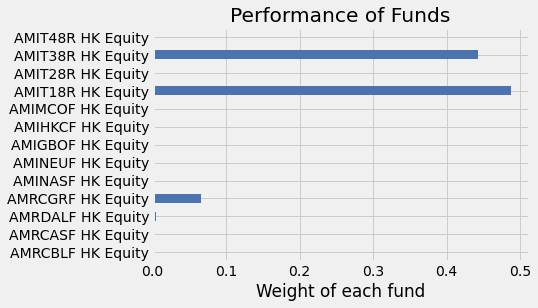

In [24]:
pd.Series(weights).plot.barh()
plt.xlabel('Weight of each fund')
plt.title("Performance of Funds")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Function 2a - Portfolio Optimization with given Risk Tolerance

### i.e. If your risk tolerance is higher, tell us what you expect and earn more return!

In [25]:
#Input your risk tolerance.
#rt = float(input("Your Risk tolerance in decimals:"))     #Interactive element hidden for now.

In [26]:
ef = EfficientFrontier(mu, S)

#ef.efficient_risk(target_volatility=rt)           #Interactive element hidden for now.
ef.efficient_risk(target_volatility=0.1)           #Hide this when using input() function
weights = ef.clean_weights()
weights

OrderedDict([('AMRCBLF HK Equity', 0.0),
             ('AMRCASF HK Equity', 0.0),
             ('AMRDALF HK Equity', 0.0),
             ('AMRCGRF HK Equity', 0.47363),
             ('AMINASF HK Equity', 0.0),
             ('AMINEUF HK Equity', 0.0),
             ('AMIGBOF HK Equity', 0.0),
             ('AMIHKCF HK Equity', 0.0),
             ('AMIMCOF HK Equity', 0.0),
             ('AMIT18R HK Equity', 0.21622),
             ('AMIT28R HK Equity', 0.0),
             ('AMIT38R HK Equity', 0.31015),
             ('AMIT48R HK Equity', 0.0)])

Text(0.5, 1.0, 'Fund Portfolio')

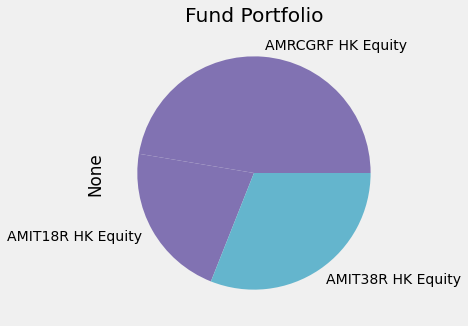

In [27]:
pd.Series(weights).plot.pie(figsize=(5,5))
plt.title("Fund Portfolio")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Function 3 - Minimise risk for a given return

In [31]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.efficient_return(target_return=0.04, market_neutral=True)
weights = ef.clean_weights()
weights

OrderedDict([('AMRCBLF HK Equity', 0.20487),
             ('AMRCASF HK Equity', 0.06317),
             ('AMRDALF HK Equity', 0.09657),
             ('AMRCGRF HK Equity', -0.07206),
             ('AMINASF HK Equity', 0.03428),
             ('AMINEUF HK Equity', -0.32094),
             ('AMIGBOF HK Equity', -0.30894),
             ('AMIHKCF HK Equity', -0.36383),
             ('AMIMCOF HK Equity', -1.0),
             ('AMIT18R HK Equity', 0.45375),
             ('AMIT28R HK Equity', 0.41909),
             ('AMIT38R HK Equity', 1.0),
             ('AMIT48R HK Equity', -0.20596)])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Plotting Efficient Frontier

In [32]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 1.4%
Annual volatility: 2.1%
Sharpe Ratio: -0.28


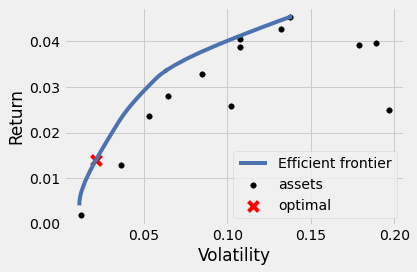

In [33]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# This scheme in a nutshell:

##         Any portfolio with volatility higher than 3.4% is bad because you earn the same afterwards. The highest return you can get is 10.6%.

In [37]:
risktolerance, annualreturn = [], []
for rt2 in np.arange(0.012, 1, 0.001):
    ef = EfficientFrontier(mu, S)
    ef.efficient_risk(target_volatility=rt2)
    weights = ef.clean_weights()
    ret, volatility, Sharpe = ef.portfolio_performance(verbose=True)
    annualreturn.append(ret)
    risktolerance.append(rt2)


Expected annual return: 0.6%
Annual volatility: 1.2%
Sharpe Ratio: -1.15
Expected annual return: 0.8%
Annual volatility: 1.3%
Sharpe Ratio: -0.96
Expected annual return: 0.9%
Annual volatility: 1.4%
Sharpe Ratio: -0.82
Expected annual return: 0.9%
Annual volatility: 1.5%
Sharpe Ratio: -0.70
Expected annual return: 1.0%
Annual volatility: 1.6%
Sharpe Ratio: -0.61
Expected annual return: 1.1%
Annual volatility: 1.7%
Sharpe Ratio: -0.53
Expected annual return: 1.2%
Annual volatility: 1.8%
Sharpe Ratio: -0.46
Expected annual return: 1.2%
Annual volatility: 1.9%
Sharpe Ratio: -0.40
Expected annual return: 1.3%
Annual volatility: 2.0%
Sharpe Ratio: -0.34
Expected annual return: 1.4%
Annual volatility: 2.1%
Sharpe Ratio: -0.30
Expected annual return: 1.4%
Annual volatility: 2.2%
Sharpe Ratio: -0.25
Expected annual return: 1.5%
Annual volatility: 2.3%
Sharpe Ratio: -0.21
Expected annual return: 1.6%
Annual volatility: 2.4%
Sharpe Ratio: -0.18
Expected annual return: 1.6%
Annual volatility: 2.5

Expected annual return: 4.4%
Annual volatility: 13.1%
Sharpe Ratio: 0.19
Expected annual return: 4.5%
Annual volatility: 13.2%
Sharpe Ratio: 0.19
Expected annual return: 4.5%
Annual volatility: 13.3%
Sharpe Ratio: 0.19
Expected annual return: 4.5%
Annual volatility: 13.4%
Sharpe Ratio: 0.19
Expected annual return: 4.5%
Annual volatility: 13.5%
Sharpe Ratio: 0.19
Expected annual return: 4.5%
Annual volatility: 13.6%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.7%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.

Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.

Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Ann

Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.

Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.

Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Ann

Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.

Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.8%
Sharpe Ratio: 0.18
Expected annual return: 4.5%
Annual volatility: 13.

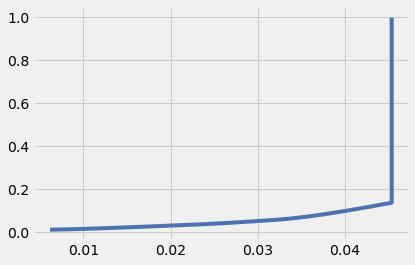

In [38]:
plt.plot(annualreturn, risktolerance)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## (C) - Backtesting and Optimization

### Split training set and test set

1. Split data in train and test set given a Date (i.e. test set is what happens after 31 July 2020 not included).

2. Split train set (i.e. what happens before 31 July 2020 included) in 7 consecutive time folds.

Then, in order not lo lose the time information, perform the following steps:
 
one = Train on fold 10,11,12,13 (2010-08-01 to 2014-07-31) –>  Test on fold 14 (2014-08-01 to 2015-07-31)

two = Train on fold 11,12,13,14 –>  Test on fold 15 

three = Train on fold 12,13,14,15 –>  Test on fold 16

four = Train on fold 13,14,15,16 –>  Test on fold 17

five = Train on fold 14,15,16,17 –>  Test on fold 18

six = Train on fold 15,16,17,18 –>  Test on fold 19 (2019-08-01 to 2020-07-31)

Compute the average of the accuracies of the 7 test folds (number of folds  – 1)

In [ ]:
from datetime import date
one = df[(df.index > pd.Timestamp(date(2010,4,5))) & (df.index < pd.Timestamp(date(2014,7,31)))]
two = df[(df.index > pd.Timestamp(date(2011,8,1))) & (df.index < pd.Timestamp(date(2015,7,31)))]
three = df[(df.index > pd.Timestamp(date(2012,8,1))) & (df.index < pd.Timestamp(date(2016,7,31)))]
four =df[(df.index > pd.Timestamp(date(2013,8,1))) & (df.index < pd.Timestamp(date(2017,7,31)))]
five =df[(df.index > pd.Timestamp(date(2014,8,1))) & (df.index < pd.Timestamp(date(2018,7,31)))]
six = df[(df.index > pd.Timestamp(date(2015,8,1))) & (df.index < pd.Timestamp(date(2019,7,31)))]

#test sets
tone = df[(df.index > pd.Timestamp(date(2014,8,1))) & (df.index < pd.Timestamp(date(2015,7,31)))]
ttwo = df[(df.index > pd.Timestamp(date(2015,8,1))) & (df.index < pd.Timestamp(date(2016,7,31)))]
tthree = df[(df.index > pd.Timestamp(date(2016,8,1))) & (df.index < pd.Timestamp(date(2017,7,31)))]
tfour = df[(df.index > pd.Timestamp(date(2017,8,1))) & (df.index < pd.Timestamp(date(2018,7,31)))]
tfive = df[(df.index > pd.Timestamp(date(2018,8,1))) & (df.index < pd.Timestamp(date(2019,7,31)))]
tsix = df[(df.index > pd.Timestamp(date(2019,8,1))) & (df.index < pd.Timestamp(date(2020,7,31)))]

### Efficient Frontier - calculating expected return and risk matrix

In [ ]:
#!pip install PyPortfolioOpt

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [ ]:
from pypfopt.risk_models import CovarianceShrinkage
S1 = CovarianceShrinkage(one).ledoit_wolf()
S2 = CovarianceShrinkage(two).ledoit_wolf()
S3 = CovarianceShrinkage(three).ledoit_wolf()
S4 = CovarianceShrinkage(four).ledoit_wolf()
S5 = CovarianceShrinkage(five).ledoit_wolf()
S6 = CovarianceShrinkage(six).ledoit_wolf()

In [ ]:
S1

In [ ]:
plotting.plot_covariance(S1, plot_correlation=True)
plotting.plot_covariance(S2, plot_correlation=True)
plotting.plot_covariance(S3, plot_correlation=True)
plotting.plot_covariance(S4, plot_correlation=True)
plotting.plot_covariance(S5, plot_correlation=True)
plotting.plot_covariance(S6, plot_correlation=True)

In [ ]:
#Calculate the expected returns and the annualised sample covariance matrix of daily asset returns.

from pypfopt.expected_returns import mean_historical_return
mu1 = mean_historical_return(one)
mu2 = mean_historical_return(two)
mu3 = mean_historical_return(three)
mu4 = mean_historical_return(four)
mu5 = mean_historical_return(five)
mu6 = mean_historical_return(six)

In [ ]:
mu1

In [ ]:
mu1.plot.barh(figsize=(10,6))

In [ ]:
mu2.plot.barh(figsize=(10,6))

In [ ]:
mu3.plot.barh(figsize=(10,6))

In [ ]:
mu4.plot.barh(figsize=(10,6))

In [ ]:
mu5.plot.barh(figsize=(10,6))

In [ ]:
mu6.plot.barh(figsize=(10,6))

In [ ]:
'''
Based on 2010-2013 data of fund Nav, found best weighting and calculated the performance of this portfolio within 2010-2013. 

Expected annual return: 7.7%
Annual volatility: 5.3%
Sharpe Ratio: 1.07
    
Based on that weighting, plug in 2014 data of fund Nav, calculate the performance of this portfolio in 2014. See if this portfolio will perform well in 2014. 

Assumption: we look at previous 4 year's data and make the decision of rebalancing portfolio, and will use that for one year.

'''

In [ ]:
t1 = mean_historical_return(tone)
t2 = mean_historical_return(ttwo)
t3 = mean_historical_return(tthree)
t4 = mean_historical_return(tfour)
t5 = mean_historical_return(tfive)
t6 = mean_historical_return(tsix)

In [ ]:
mu1.plot.barh(figsize=(10,6))    #return of each funds from 2010 to 2014.

In [ ]:
t1.plot.barh(figsize=(10,6))  #return of each fund from 2014 to 2015. (test period)

In [ ]:
#calculate the asset returns in our portfolio.
ret_data = tone.pct_change()[1:]

In [ ]:
#calculate the weighted returns of our assets.
weighted_returns = (cleaned_weights * ret_data)

In [ ]:
#portfolio returns are simply the sum of the weighted returns of the assets. So lets add the rows.
port_ret = weighted_returns.sum(axis=1)
print("Portfolio return in test year(%):")
print(sum(port_ret)*100)
print("Portfolio return compared to previous year(+- %):")
print((sum(port_ret) - rt)*100)

In [ ]:
ax1 = weighted_returns.plot(figsize=(20,15))
ax1.set_xlabel('date')
ax1.set_ylabel("Portfolio return")
ax1.set_title("Portfolio Returns in Test year")
plt.show()

In [ ]:
one = Train on fold 10,11,12,13 –> Test on fold 14

two = Train on fold 11,12,13,14 –> Test on fold 15

three = Train on fold 12,13,14,15 –> Test on fold 16

four = Train on fold 13,14,15,16 –> Test on fold 17

five = Train on fold 14,15,16,17 –> Test on fold 18

six = Train on fold 15,16,17,18 –> Test on fold 19

seven = Train on fold 16,17,18,19 –> Test on fold 20

Compute the average of the accuracies of the 7 test folds (number of folds – 1)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [ ]:
#anomaly detection - benchmark abnormal situations, find 

In [ ]:
#for getting HSI data.

symbols = ['HSI','SPY']
price_data = web.get_data_yahoo(symbols,
                               start = '2010-01-01',
                               end = '2020-07-31')

In [ ]:
def performTimeSeriesCV(X_train, y_train, number_folds, algorithm, parameters):
    """
    Given X_train and y_train (the test set is excluded from the Cross Validation),
    number of folds, the ML algorithm to implement and the parameters to test,
    the function acts based on the following logic: it splits X_train and y_train in a
    number of folds equal to number_folds. Then train on one fold and tests accuracy
    on the consecutive as follows:
    - Train on fold 1, test on 2
    - Train on fold 1-2, test on 3
    - Train on fold 1-2-3, test on 4
    ....
    Returns mean of test accuracies.
    """
 
    print ('Parameters --------------------------------> ', parameters)
    print ('Size train set: ', X_train.shape)
    
    # k is the size of each fold. It is computed dividing the number of 
    # rows in X_train by number_folds. This number is floored and coerced to int
    k = int(np.floor(float(X_train.shape[0]) / number_folds))
    print ('Size of each fold: ', k)
    
    # initialize to zero the accuracies array. It is important to stress that
    # in the CV of Time Series if I have n folds I test n-1 folds as the first
    # one is always needed to train
    accuracies = np.zeros(number_folds-1)
 
    # loop from the first 2 folds to the total number of folds    
    for i in range(2, number_folds + 1):
        print ('')
        
        # the split is the percentage at which to split the folds into train
        # and test. For example when i = 2 we are taking the first 2 folds out 
        # of the total available. In this specific case we have to split the
        # two of them in half (train on the first, test on the second), 
        # so split = 1/2 = 0.5 = 50%. When i = 3 we are taking the first 3 folds 
        # out of the total available, meaning that we have to split the three of them
        # in two at split = 2/3 = 0.66 = 66% (train on the first 2 and test on the
        # following)
        split = float(i-1)/i
        
        # example with i = 4 (first 4 folds):
        #      Splitting the first       4        chunks at          3      /        4
        print ('Splitting the first ' + str(i) + ' chunks at ' + str(i-1) + '/' + str(i))
        
        # as we loop over the folds X and y are updated and increase in size.
        # This is the data that is going to be split and it increases in size 
        # in the loop as we account for more folds. If k = 300, with i starting from 2
        # the result is the following in the loop
        # i = 2
        # X = X_train[:(600)]
        # y = y_train[:(600)]
        #
        # i = 3
        # X = X_train[:(900)]
        # y = y_train[:(900)]
        # .... 
        X = X_train[:(k*i)]
        y = y_train[:(k*i)]
        print ('Size of train + test: ', X.shape) # the size of the dataframe is going to be k*i
 
        # X and y contain both the folds to train and the fold to test.
        # index is the integer telling us where to split, according to the
        # split percentage we have set above
        index = int(np.floor(X.shape[0] * split))
        
        # folds used to train the model        
        X_trainFolds = X[:index]        
        y_trainFolds = y[:index]
        
        # fold used to test the model
        X_testFold = X[(index + 1):]
        y_testFold = y[(index + 1):]
        
        # i starts from 2 so the zeroth element in accuracies array is i-2. performClassification() is a function which takes care of a classification problem. This is only an example and you can replace this function with whatever ML approach you need.
        accuracies[i-2] = performClassification(X_trainFolds, y_trainFolds, X_testFolds, y_testFolds, algorithm, parameters)
        
        # example with i = 4:
        #      Accuracy on fold         4     :    0.85423
        print ('Accuracy on fold ' + str(i) + ': ', acc[i-2])
    
    # the function returns the mean of the accuracy on the n-1 folds    
    return accuracies.mean()

In [ ]:
import os

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from pprint import pprint

from scipy.optimize import minimize


### Portfolio Performance Metrics

In [ ]:
def sharpe(returns, rf=0, days=1):
    volatility = returns.std() * np.sqrt(days) 
    sharpe_ratio = (returns.mean() - rf) / volatility
    return sharpe_ratio

def information_ratio(returns, benchmark_returns, days=252):
    return_difference = returns - benchmark_returns 
    volatility = return_difference.std() * np.sqrt(days) 
    information_ratio = return_difference.mean() / volatility
    return information_ratio

In [ ]:
#Equal-weighted portfolio (1/N) (re-balancing)
M = 120
pfRet=[]
pfStratRet = dict()
pfSharpeR = dict()

for date,assRet in df[M:].iterrows():      
    N = len(assRet)
    tgtWtg = 1/N*np.ones(N)
    
    assRet = np.array(assRet.values)
    pfRet.append(float(tgtWtg@assRet))
    
dfStratRet = pd.DataFrame(pfRet,index=df[M:].index,columns=['ew-rebal']) 
dfStratRet.head()

In [ ]:
#Mean-variance portfolio, Out-of-sample, Matrix Calculus

mean_OOS = df.rolling(M,min_periods=M,win_type=None).mean().dropna()
cov_OOS = df.rolling(M,min_periods=M,win_type=None).cov().dropna()